# Gather

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from pandas.io.json import json_normalize  

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', 200)

### Sources for gathering data
1. Read Enhanced Twitter Archive : twitter-archive-enhanced.csv
2. Image predictions : Image-predictions.tsv : Should be downloaded programatically
2. Additional Data via the Twitter API : Using Twitter API via TweetID query JSON data using Tweepy Library : tweet_json.txt

In [3]:
# 1. Read Enhanced Twitter Archive : twitter-archive-enhanced.csv : eta_df
eta_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# 2. Image predictions : Image-predictions.tsv : Should be downloaded programatically : ip_df

# a. create image-predictions folder
folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    

# Initially this should be empty
os.listdir(folder)    

['image-predictions.tsv']

In [5]:
# b. Download image-predictions.tsv file programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

    
# Check file if properly downloaded
os.listdir(folder)

['image-predictions.tsv']

In [6]:
# Read image-predictions.tsv file
ip_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')

In [7]:
# Read using Twitter API - RUN ONCE ONLY
'''
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '@@@@'
consumer_secret = '@@@@'
access_token = '@@@@'
access_secret = '@@@@'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = eta_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('test-tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'@@@@\'\nconsumer_secret = \'@@@@\'\naccess_token = \'@@@@\'\naccess_secret = \'@@@@\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = eta_df.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive

In [7]:
# Read Twitter JSON file
#tweet_api_df = pd.read_json('tweet-json', lines=True) # dataset giving Udacity has 2354
#len(list(tweet_api_df['contributors']))

tweet_api_df = pd.read_json('tweet_json.txt', lines=True) #dataset downloaded via twitter API has 2333
print('Size = ',tweet_api_df.shape)

Size =  (2333, 32)


# Assess

###  Enhanced Twitter Archive

In [8]:
eta_df.head()
#eta_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [9]:
eta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
eta_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
eta_df.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Toby            7
Daisy           7
Bailey          7
Buddy           7
an              7
Oscar           6
Milo            6
Koda            6
Jack            6
Jax             6
Bella           6
Stanley         6
Scout           6
Dave            6
Rusty           6
Leo             6
very            5
             ... 
Wesley          1
Creg            1
Norman          1
Ricky           1
Brandonald      1
Lillie          1
Kane            1
Suki            1
Beckham         1
Andy            1
Brandy          1
Flash           1
Alejandro       1
Tommy           1
Ruffles         1
Kulet           1
Beemo           1
Bilbo           1
Hector          1
Jazzy           1
Barclay         1
Tanner          1
Tupawc          1
Jarvis          1
Bayley    

In [12]:
eta_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
# Some texts are not complete as they end with elipsis
#list(eta_df['text'])[100:105]
temp = eta_df.loc[:, ['tweet_id', 'text', 'expanded_urls']]
temp.head()

,tweet_id,text,expanded_urls
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"


In [14]:
eta_df[eta_df.tweet_id == 666051853826850816]['source']

2349    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [15]:
eta_df[eta_df.retweeted_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None


In [16]:
list(eta_df[eta_df.retweeted_status_id.notnull()]['retweeted_status_user_id'].astype(np.int64)[:5])
#df['column name'].astype(np.int64)

[4196983835, 19607400, 4196983835, 4196983835, 4196983835]

In [17]:
# check to see if any twitter ID is duplicated
eta_df[eta_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
# Below are replies to tweets
eta_df[eta_df.in_reply_to_status_id.notnull()]['in_reply_to_status_id'].astype(np.int64)
eta_df[eta_df.in_reply_to_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [19]:
# We have only 17 matches in our et_df
# Trump in here 855818117272018944
ids = eta_df[eta_df.in_reply_to_status_id.notnull()]['in_reply_to_status_id'].astype(np.int64)
eta_df.loc[eta_df['tweet_id'].isin(ids)].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
192,855818117272018944,NaN,NaN,2017-04-22 16:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUST WANTS TO SAY HI AND MAYBE A NOGGIN PAT SHOW SOME RESPECT 13/10 https://t.co/5BEjzT2Tth,NaN,NaN,NaN,https://twitter.com/markhalperin/status/855656431005061120,13,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
499,813127251579564032,NaN,NaN,2016-12-25 21:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's an anonymous doggo that appears to be very done with Christmas. 11/10 cheer up pup https://t.co/BzITyGw3JA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/813127251579564032/photo/1,https://twitter.com/dog_rates/status/813127251579564032/photo/1",11,10,None,doggo,None,None,None
514,811627233043480576,NaN,NaN,2016-12-21 17:39:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Augie. He's a savage. Doesn't give a h*ck about your garden. Still 10/10 would forgive then pet https://t.co/IU8S0n4oxn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811627233043480576/photo/1,10,10,Augie,None,None,None,None
896,759099523532779520,NaN,NaN,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759099523532779520/photo/1,7,10,Toby,None,None,None,None


### Image predictions

In [20]:
ip_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Some are not dogs
#1. Checking only p1_dog value_counts()
print(ip_df.p1_dog.value_counts())

#2. Checking all p*_dog
# Below are not dogs
not_dogs = ip_df.query('p1_dog == False and p2_dog == False and p3_dog == False')
print(not_dogs.shape)

True     1532
False     543
Name: p1_dog, dtype: int64
(324, 12)


In [23]:
# What pictures have
ip_df.p1[ip_df.p1_dog == False].value_counts()

seat_belt        22
web_site         19
teddy            18
tennis_ball       9
dingo             9
doormat           8
hamster           7
tub               7
Siamese_cat       7
swing             7
bath_towel        7
home_theater      6
llama             6
ice_bear          6
car_mirror        6
shopping_cart     5
ox                5
porcupine         5
hippopotamus      5
minivan           5
barrow            4
bathtub           4
brown_bear        4
jigsaw_puzzle     4
Arctic_fox        4
patio             4
guinea_pig        4
goose             4
wombat            4
hog               4
                 ..
bighorn           1
cheeseburger      1
bearskin          1
timber_wolf       1
alp               1
swab              1
lawn_mower        1
crane             1
lynx              1
wooden_spoon      1
fiddler_crab      1
stove             1
prayer_rug        1
bakery            1
banana            1
bookshop          1
bookcase          1
peacock           1
revolver          1


In [24]:
# Check to see if any Twitter ID is duplicated
ip_df[ip_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
# Duplicate Images
# ip_df[ip_df.jpg_url.duplicated()].count() # i Dont understand this output
ip_df[ip_df.jpg_url.duplicated(keep = False)].sort_values(by = 'jpg_url').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True


In [26]:
# Check in eta_df for the tweet details - Original Post
eta_df[eta_df.tweet_id == 675354435921575936]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435921575936/video/1,13,10,None,None,None,None,None


In [27]:
# Check in eta_df for the tweet details - This is retweeted after 7 Months. retweeted_status_id seems to the tweet_id
eta_df[eta_df.tweet_id == 752309394570878976]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,"https://twitter.com/dog_rates/status/675354435921575936/video/1,https://twitter.com/dog_rates/status/675354435921575936/video/1",13,10,None,None,None,None,None


### tweet_api_df

In [28]:
# Data from Tweet API
tweet_api_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...",37150,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,NaN,NaN,NaN,NaN,7947,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagra..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.co...",31957,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,...,NaN,NaN,NaN,NaN,5902,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagra..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.co...",24068,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,...,NaN,NaN,NaN,NaN,3902,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagra..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com...",40474,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,...,NaN,NaN,NaN,NaN,8099,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagra..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]"

In [29]:
tweet_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2333 non-null datetime64[ns]
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null float64
id                               2333 non-null int64
id_str                           2333 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [30]:
#Checking values in each column
tweet_api_df.contributors.value_counts()

Series([], Name: contributors, dtype: int64)

In [31]:
#Checking JSON column in dataframe
list(tweet_api_df['entities'].head())

[{'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},
 {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 

In [41]:
# (888078426338406400)I like this https://pbs.twimg.com/media/DFMWn56WAAAYUcB.jpg
# This dog displayed in Fun Stuff section in the bottom
tweet_api_df[tweet_api_df.id == 888078426338406400]
tweet_api_df['extended_entities'][19]['media']

[{'id': 888078426338406400,
  'id_str': '888078426338406400',
  'indices': [128, 151],
  'media_url': 'http://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg',
  'media_url_https': 'https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg',
  'url': 'https://t.co/DK7iDPfuRX',
  'display_url': 'pic.twitter.com/DK7iDPfuRX',
  'expanded_url': 'https://twitter.com/dog_rates/status/888078434458587136/photo/1',
  'type': 'photo',
  'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
   'medium': {'w': 964, 'h': 1200, 'resize': 'fit'},
   'large': {'w': 1285, 'h': 1600, 'resize': 'fit'},
   'small': {'w': 546, 'h': 680, 'resize': 'fit'}}},
 {'id': 888078426338361344,
  'id_str': '888078426338361344',
  'indices': [128, 151],
  'media_url': 'http://pbs.twimg.com/media/DFMWn56WAAAYUcB.jpg',
  'media_url_https': 'https://pbs.twimg.com/media/DFMWn56WAAAYUcB.jpg',
  'url': 'https://t.co/DK7iDPfuRX',
  'display_url': 'pic.twitter.com/DK7iDPfuRX',
  'expanded_url': 'https://twitter.com/dog_rates/status/888078

In [42]:
list(tweet_api_df['extended_entities'].head())
#tweet_api_df['extended_entities'].to_csv('find_image.txt')
#tweet_api_df[tweet_api_df.id == 888078426338406400]

[{'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},
 {'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'e

In [43]:
list(tweet_api_df['user'].head(1))

[{'id': 4196983835,
  'id_str': '4196983835',
  'name': 'WeRateDogs™',
  'screen_name': 'dog_rates',
  'location': '「 DM YOUR DOGS 」',
  'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
  'url': 'https://t.co/N7sNNHAEXS',
  'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
      'expanded_url': 'http://weratedogs.com',
      'display_url': 'weratedogs.com',
      'indices': [0, 23]}]},
   'description': {'urls': []}},
  'protected': False,
  'followers_count': 8339793,
  'friends_count': 14,
  'listed_count': 6482,
  'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
  'favourites_count': 143209,
  'utc_offset': None,
  'time_zone': None,
  'geo_enabled': True,
  'verified': True,
  'statuses_count': 10754,
  'lang': None,
  'contributors_enabled': False,
  'is_translator': False,
  'is_translation_enabled': False,
  'profile_background_color': '000000',
  'profile_background_image_u

In [44]:
#Assessing JSON column user
df1 = json_normalize(tweet_api_df['user'])
df1.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities.description.urls,entities.url.urls,favourites_count,follow_request_sent,followers_count,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,Sun Nov 15 21:41:29 +0000 2015,False,False,Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀,[],"[{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]",143209,False,8339793,...,000000,False,False,dog_rates,10754,None,none,https://t.co/N7sNNHAEXS,None,True
1,False,Sun Nov 15 21:41:29 +0000 2015,False,False,Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀,[],"[{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]",143209,False,8339793,...,000000,False,False,dog_rates,10754,None,none,https://t.co/N7sNNHAEXS,None,True
2,False,Sun Nov 15 21:41:29 +0000 2015,False,False,Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀,[],"[{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]",143209,False,8339793,...,000000,False,False,dog_rates,10754,None,none,https://t.co/N7sNNHAEXS,None,True
3,False,Sun Nov 15 21:41:29 +0000 2015,False,False,Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀,[],"[{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]",143209,False,8339793,...,000000,False,False,dog_rates,10754,None,none,https://t.co/N7sNNHAEXS,None,True
4,False,Sun Nov 15 21:41:29 +0000 2015,False,False,Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀,[],"[{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]",143209,False,8339793,...,000000,False,False,dog_rates,10754,None,none,https://t.co/N7sNNHAEXS,None,True


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 43 columns):
contributors_enabled                  2333 non-null bool
created_at                            2333 non-null object
default_profile                       2333 non-null bool
default_profile_image                 2333 non-null bool
description                           2333 non-null object
entities.description.urls             2333 non-null object
entities.url.urls                     2333 non-null object
favourites_count                      2333 non-null int64
follow_request_sent                   2333 non-null bool
followers_count                       2333 non-null int64
following                             2333 non-null bool
friends_count                         2333 non-null int64
geo_enabled                           2333 non-null bool
has_extended_profile                  2333 non-null bool
id                                    2333 non-null int64
id_str                    

In [46]:
df1.url.value_counts()

https://t.co/N7sNNHAEXS    2333
Name: url, dtype: int64

In [47]:
# Find duplicate columns in dataset
all_columns = pd.Series(list(eta_df) + list(ip_df) + list(tweet_api_df))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
58                   source
dtype: object

In [48]:
# Getting the length of tweet_id
print(
(eta_df['tweet_id'].astype(str)).apply(len).unique(),
(ip_df['tweet_id'].astype(str)).apply(len).unique()
)

[18] [18]


In [49]:
#Intersection between eta_df & ip_df
eta_ids = set(eta_df.tweet_id)
ip_ids = set(ip_df.tweet_id)
print(len(eta_ids), len(ip_ids), len(eta_ids.intersection(ip_ids)))

2356 2075 2075


### Quality  
1) eta_df : name : Dog names missing filled with incorrect names. None should be converted to NaN Eg., (None(745), a(55) )    
2) eta_df : Only original posts are required. (in_reply_to_status_id, retweeted_status_id) = NaN should be kept as they are the original tweet. 78 replies/retweets found  
3) eta_df : retweeted columns not required(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)  
4) eta_df : denominator : Max denominator is expected to be 10. But there are other values as well  
5) eta_df : text : Some texts are not complete as they end with elipsis  
6) eta_df : stage : if dog doesn't have a stage(doggo, floofer, pupper, puppo) it should NaN not None  
7) eta_df : Some dogs are in multiple stages like below
            733109485275860992
            741067306818797568
            751583847268179968
            781308096455073793
            785639753186217984
            801115127852503040
            808106460588765185
            817777686764523521
            854010172552949760
            855851453814013952

8) ip_df : Some of data in image-predictions is not dogs ( shopping_cart, box_turtle ). 543 are not dogs.  
9) ip_df : There are around 104 duplicate images having different tweet_ids. Probably user retweeted same images.  
10)ip_df : Remove '_'(underscore) from dognames p1, p2, p3  

### Tidiness  
1) eta_df : Wrong datatype : Need to be converted from float64 to int64 : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id	
2) eta_df : Wrong datatype : (timetamp, retweeted_status_timestamp) is defined as non-null object it should be datetime  
3) eta_df : Columns not required as per requirement : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp  
4) eta_df : Change four columns to one column 'stage' (doggo, floofer, pupper, puppo)  
5) tweet_api_df: Datatype Conversion from float64 to int64 : in_reply_to_status_id, in_reply_to_user_id, quoted_status_id   
6) tweet_api_df: Removing columns with no value/information to process(contributors, coordinates, display_text_range, favorited, geo, possibly_sensitive, possibly_sensitive_appealable, quoted_status_permalink, retweeted, truncated, place, extended_entities, user)  
* Mostly all information which entities have only extended_entities have so extended_entities can be removed
* tweet_api_df - Mostly all rows have same values in tweet_api_df['user'] column can be dropped

7) eta_df : Create a new column to have tweet_id as string  
8) ip_df  : Create a new column to have tweet_id as string  
9) tweet_api_df: move id & id_str column to the beginning of the dataframe & rename it was tweet_id & tweet_id_str  
10) eta_clean : Find dog gender based on column 'text'

### Discovery  
1) eta_df : Trump in here 855818117272018944. Somewhere down the link  https://twitter.com/markhalperin/status/855656431005061120  
Post from @BethRickenbaker. You will find trump  
"Seriously, @delta??!?" Please seat me next to the adorable dog in the bow tie."

# Clean

In [69]:
# Make copies of files
eta_clean = eta_df.copy()
ip_clean = ip_df.copy()
tweet_api_clean = tweet_api_df.copy()

### eta_clean

`Issue 1` : **Missing dog names**

#### Define  
1) eta_clean : name : None should be converted to NaN Eg., (None(745), a(55) )    

#### Code  

In [70]:
# 1) eta_clean : name : Dog names missing filled with incorrect names. None should be converted to NaN Eg., (None(745), a(55) )

# 745 are identified as None
eta_clean[eta_clean.name == 'None'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None


In [71]:
# 1) eta_clean : name : Dog names missing filled with incorrect names. None should be converted to NaN Eg., (None(745), a(55) )
eta_clean.name = eta_clean.name.replace('None', np.nan)

#### Test

In [72]:
# eta_clean : name : Dog names missing filled with incorrect names. None should be converted to NaN Eg., (None(745), a(55) )
eta_clean[eta_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`Issue 2 ` : **Only original posts are required**

#### Define
2) eta_clean : (in_reply_to_status_id, retweeted_status_id) = NaN should be kept as they are the original tweet. 78 replies/retweets found   

#### Code

In [73]:
eta_clean = eta_clean[eta_clean.in_reply_to_status_id.isnull()]
eta_clean = eta_clean[ eta_clean.retweeted_status_id.isnull()]

#### Test

In [74]:
print(len(eta_clean['in_reply_to_status_id']),
      len(eta_clean[ eta_clean.in_reply_to_status_id.isnull() ]['in_reply_to_status_id']), 
      len(eta_clean[ eta_clean.in_reply_to_status_id.isnull() ]['retweeted_status_id']))

2097 2097 2097


`Issue 3 ` : **Replace dog_stage from None to NaN**
#### Define
6) eta_clean : stage : Replace from None to NaN in columns (doggo, floofer, pupper, puppo) 

#### Code

In [75]:
eta_clean.doggo = eta_clean.doggo.replace('None', np.nan)
eta_clean.floofer = eta_clean.floofer.replace('None', np.nan)
eta_clean.pupper = eta_clean.pupper.replace('None', np.nan)
eta_clean.puppo = eta_clean.puppo.replace('None', np.nan)

#### Test

In [76]:
eta_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN


### ip_clean

`Issue 4 ` : **Remove rows which are not dogs in image predictions**

#### Define 
8) ip_df : Some of data in image-predictions is not dogs ( shopping_cart, box_turtle ). 543 are not dogs  

#### Code

In [77]:
# Elminating non-dogs
not_dogs = ip_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')
dogs = ip_clean.index.difference(not_dogs.index)
print('All      = ',ip_clean.shape)
print('Not Dogs = ',not_dogs.shape)
print('Dogs     = ',dogs.shape)

ip_clean = ip_clean.loc[dogs].copy()


All      =  (2075, 12)
Not Dogs =  (324, 12)
Dogs     =  (1751,)


In [78]:
# Adding column count_dog_confidence
temp = ip_clean.loc[:, ['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]
#temp = temp[ip_clean['p1_dog'] != ip_clean['p2_dog']]

twids = temp.tweet_id
true_counts = []
for twid in twids:
    count = 0
    temp2 = temp[temp.tweet_id == twid]
    ix = temp2.tweet_id.index.values[0]
    
    confidence = temp2.p1_dog.item()
    if(confidence == True):
        count+=1

    confidence = temp2.p2_dog.item()
    if(confidence == True):
        count+=1

    confidence = temp2.p3_dog.item()
    if(confidence == True):
        count+=1

    temp.at[ix,'count_dog_confidence']=count
    #print(ix, twid, temp2.p1_dog.item(), temp2.p2_dog.item(), temp2.p3_dog.item(), count)
    

temp.count_dog_confidence = temp.count_dog_confidence.astype('int64')
temp.shape


(1751, 12)

In [79]:

ip_clean= pd.merge(ip_clean,temp[['tweet_id','count_dog_confidence']],on='tweet_id', how='inner')
ip_clean.shape

(1751, 13)

In [80]:
# 3=Its a dog; 2=It might be a dog; 1=It could be a dog, not sure
ip_clean.count_dog_confidence.value_counts()

3    1243
2     347
1     161
Name: count_dog_confidence, dtype: int64

### Test

In [81]:
not_dogs = ip_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')
print('Not Dogs = ',not_dogs.shape)

Not Dogs =  (0, 13)


In [82]:
not_dogs = ip_clean.query('p1_dog == True and p2_dog == True and p3_dog == True')
print('True Dogs = ',not_dogs.shape)

True Dogs =  (1243, 13)


`Issue 5 ` : **Removing duplicate images**

#### Define 
8) ip_df : There are around 104 duplicate images having different tweet_ids.    

#### Code

In [83]:
ip_clean[ip_clean.jpg_url.duplicated(keep = False)].sort_values(by = 'jpg_url').head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,count_dog_confidence
1063,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,2
363,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,2
1565,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,3
1363,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,3
1422,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,3
1411,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,3
1559,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True,2
1424,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True,2
1434,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,3
1435,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,3


In [84]:
# Making a copy of the ip_clean before making changes
# Checking to see if tweets in ip found in eta and updating the new column status with timestamp
ip_copy = ip_clean.copy()
etaids= eta_clean['tweet_id']
ipids = ip_copy['tweet_id']
found_in_eta = []

for i, ipid in ipids.iteritems():
    if (eta_clean['tweet_id'] == ipid).any():
        ip_copy.at[i,'status']=True
        #ip_copy['found'] = True # This gives out warning
        ts = eta_clean.timestamp[ eta_clean['tweet_id'] == ipid]
        ip_copy.at[i,'timestamp']=ts.values[0]
        #print(ipid, ts.values[0])
    else:
        ip_copy.at[i,'status']=False
        ip_copy.at[i,'timestamp']=np.NaN


ip_copy.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,count_dog_confidence,status,timestamp
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,3,True,2015-11-15 22:32:08 +0000
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,3,True,2015-11-15 23:05:30 +0000
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,3,True,2015-11-15 23:21:54 +0000
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,3,True,2015-11-16 00:04:52 +0000
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,3,True,2015-11-16 00:24:50 +0000
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,3,True,2015-11-16 00:30:50 +0000
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,2,True,2015-11-16 00:49:46 +0000
7,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,1,True,2015-11-16 00:55:59 +0000
8,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,3,True,2015-11-16 01:01:59 +0000
9,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,3,True,2015-11-16 01:22:45 +0000


In [85]:
ip_copy[ip_copy.jpg_url.duplicated(keep = False)].sort_values(by = 'jpg_url').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,count_dog_confidence,status,timestamp
1063,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,2,False,NaN
363,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,2,True,2015-12-11 16:40:19 +0000
1565,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,3,False,NaN
1363,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,3,True,2016-12-09 06:17:20 +0000
1422,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,3,False,NaN


In [86]:
# By assessing the outputs found that half the duplicate image tweets in ip which were not found in eta. 
#So probably they were retweets. Updating the status as 'deleted.'
temp = ip_copy[ip_copy.jpg_url.duplicated(keep = False)].sort_values(by = 'jpg_url') #.head(200)
dup_images = (temp[temp.status == False]['tweet_id'])

#ip_copy[ip_copy.tweet_id == 807106840509214720]['status']
for twid in dup_images:
    #print(twid)    
    #print(ip_copy[ip_copy['tweet_id'] == twid]['status'])
    ix = ip_copy[ip_copy['tweet_id'] == twid]['status'].index.values[0]
    #print('Tweet_ID = ',twid,'Index = ',ix)
    ip_copy.at[ix,'status']='deleted'
    
print(ip_copy.status.value_counts())

True       1666
deleted      60
False        25
Name: status, dtype: int64


In [87]:
# Copying back to ip_clean valid data
ip_clean = ip_copy[ip_copy.status != 'deleted'].copy()
print(ip_clean.status.value_counts())

True     1666
False      25
Name: status, dtype: int64


`Issue 6 ` : **Remove underscore from dog names**
#### Define
10)ip_df : Replace '_'(underscore) from dognames p1, p2, p3
    
#### Code

In [88]:
for i in ('p1','p2','p3'):
    ip_clean[str(i)]=ip_clean[str(i)].str.replace("_", ' ')
    ip_clean[str(i)]=ip_clean[str(i)].str.capitalize()

#### Test

In [89]:
ip_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,count_dog_confidence,status,timestamp
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,3,True,2015-11-15 22:32:08 +0000
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,3,True,2015-11-15 23:05:30 +0000
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,3,True,2015-11-15 23:21:54 +0000
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,3,True,2015-11-16 00:04:52 +0000
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,3,True,2015-11-16 00:24:50 +0000


### Tidiness 

### eta_clean

`Issue 7 ` : **Change datatypes** 

#### Define  
1) eta_df : Wrong datatype : Need to be converted from float64 to int64 : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id  
2) eta_df : Wrong datatype : (timetamp, retweeted_status_timestamp) is defined as non-null object it should be datetime  
3) eta_df : Columns not required as per requirement : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp  

#### Code  

In [90]:
eta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1494 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: float64(4), int64(3), object(10)
memory

In [91]:
eta_clean.timestamp = eta_clean.timestamp.astype(np.datetime64)

In [92]:
eta_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                  'retweeted_status_timestamp'], inplace = True, axis = 1)

#### Test

In [93]:
# 2) eta_df : Wrong datatype : (timetamp, retweeted_status_timestamp) is defined as non-null object it should be datetime
# 3) eta_df : Columns not required as per requirement : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
eta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


`Issue 8 ` : **Merge four columns to one**

#### Define
4) eta_df : Change four columns to one column 'stage' (doggo, floofer, pupper, puppo)  

#### Code

In [66]:
#eta_clean2 = eta_clean.copy()

In [94]:
#Melt create multiple duplicate rows, these duplicate rows are handled via Quality(Point 7)
eta_clean = pd.melt(eta_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                          value_name='dog_stage')
eta_clean.drop(['variable'], inplace = True, axis = 1)

In [95]:
eta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 9 columns):
tweet_id              8388 non-null int64
timestamp             8388 non-null datetime64[ns]
source                8388 non-null object
text                  8388 non-null object
expanded_urls         8376 non-null object
rating_numerator      8388 non-null int64
rating_denominator    8388 non-null int64
name                  5976 non-null object
dog_stage             347 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 589.9+ KB


In [96]:
eta_clean.sort_values(by ='tweet_id' ).head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
4193,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,NaN
6290,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,NaN
2096,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,NaN
8387,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,NaN
2095,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,NaN


`Issue 9 ` : **Some dogs have multiple stages**

#### Define
Below is quality point(7) handled in tidiness due to melt being part of tidiness   
7) eta_df : Some dogs are in multiple stages like below 733109485275860992 741067306818797568 751583847268179968 781308096455073793 785639753186217984 801115127852503040 808106460588765185 817777686764523521 854010172552949760 855851453814013952   
and remove duplicate rows introduced by melt.

#### Code

In [97]:
print('Full data - eta_clean = '+str(eta_clean.shape))

#Not Null - Handling dog_stage != NaN. Moving dogs with stages to dup_not_nan
dup_not_nan = eta_clean[eta_clean.dog_stage.notnull()]
print('1. !NaN = '+str(dup_not_nan.shape))
## Handling duplicates of same tweet_id having dog with multiple stages
dup_not_nan = dup_not_nan.drop_duplicates(subset=['tweet_id'])
print('2. !NaN = '+str(dup_not_nan.shape))

#Null - Handling dog_stage == NaN. Moving dogs without stages to dup_nan
dup_nan = eta_clean[eta_clean.dog_stage.isnull()]
dup_nan = dup_nan.drop_duplicates(subset=['tweet_id'])
print('3. NaN = '+str(dup_nan.shape))

Full data - eta_clean = (8388, 9)
1. !NaN = (347, 9)
2. !NaN = (336, 9)
3. NaN = (2097, 9)


In [98]:
dup_not_nan[dup_not_nan.tweet_id == 672160042234327040]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5960,672160042234327040,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,pupper


In [99]:
dup_nan[dup_nan.tweet_id == 672160042234327040]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1766,672160042234327040,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,NaN


In [100]:
# Append NaN & not NaN data
eta_full = dup_nan.append(dup_not_nan)
print(eta_full.shape)
eta_full = eta_full.sort_values(by ='tweet_id')
eta_full[eta_full.tweet_id == 672160042234327040]
#eta_full.tweet_id.value_counts()

(2433, 9)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5960,672160042234327040,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,pupper
1766,672160042234327040,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,NaN


In [101]:
# Eliminating duplicates
dup_list = []
single_list = []
eta_new_full = pd.DataFrame()

for tid in eta_full.tweet_id:
    #this continue is added because eta_full will have duplicates 1)with dog_stage 2)with dog_stage as NaN
    if tid in dup_list:
        continue
    if tid in single_list:
        continue
        
    temp = eta_full[eta_full.tweet_id == tid]
    if temp.shape[0] == 2 :        
        dup_list.append(tid)
        test = temp[temp.dog_stage.notnull()]
        #print(tid, test.shape[0])
        eta_new_full = eta_new_full.append(test)
    else:
        single_list.append(tid)
        eta_new_full = eta_new_full.append(temp)
        
#print(len(dup_list), len(single_list))
#print(dup_list[:5])
print(single_list[:5])
#print(eta_new_full.shape)

#test = eta_full[eta_full.tweet_id == 672160042234327040]['dog_stage']
#print(test.values)
eta_clean = eta_new_full.copy()

[666020888022790149, 666029285002620928, 666033412701032449, 666044226329800704, 666049248165822465]


#### Test

In [102]:
eta_clean[eta_clean.tweet_id == 672160042234327040]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5960,672160042234327040,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,pupper


In [103]:
dups = eta_clean.pivot_table(index=['tweet_id', 'dog_stage'], aggfunc='size')
dups.head()

tweet_id            dog_stage
672160042234327040  pupper       1
672205392827572224  pupper       1
672254177670729728  pupper       1
672481316919734272  pupper       1
672594978741354496  pupper       1
dtype: int64

`Issue 10 ` : **Creating new column(tweet_id_str) in eta_clean & ip_clean** 

#### Define
7) eta_clean : Create a new column to have tweet_id as string  
8) ip_clean  : Create a new column to have tweet_id as string  

#### Code

In [104]:
eta_clean.insert(1, "tweet_id_str", "", True)
eta_clean['tweet_id_str'] = eta_clean['tweet_id']

In [105]:
ip_clean.insert(1, "tweet_id_str", "", True)
ip_clean['tweet_id_str'] = ip_clean['tweet_id']

#### Test

In [106]:
eta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2096 to 0
Data columns (total 10 columns):
tweet_id              2097 non-null int64
tweet_id_str          2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
dog_stage             336 non-null object
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 180.2+ KB


In [107]:
ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1750
Data columns (total 16 columns):
tweet_id                1691 non-null int64
tweet_id_str            1691 non-null int64
jpg_url                 1691 non-null object
img_num                 1691 non-null int64
p1                      1691 non-null object
p1_conf                 1691 non-null float64
p1_dog                  1691 non-null bool
p2                      1691 non-null object
p2_conf                 1691 non-null float64
p2_dog                  1691 non-null bool
p3                      1691 non-null object
p3_conf                 1691 non-null float64
p3_dog                  1691 non-null bool
count_dog_confidence    1691 non-null int64
status                  1691 non-null object
timestamp               1666 non-null object
dtypes: bool(3), float64(3), int64(4), object(6)
memory usage: 189.9+ KB


`Issue 11 ` : **Removing unused columns**

#### Define
6) tweet_api_df: Removing columns with no value/information to process(contributors, coordinates, display_text_range, favorited, geo, possibly_sensitive, possibly_sensitive_appealable, quoted_status_permalink, retweeted, truncated, place)

#### Code

In [108]:
tweet_api_clean.drop(['contributors', 'coordinates', 'display_text_range', 'favorited', 'geo', 'possibly_sensitive'
                    , 'possibly_sensitive_appealable', 'quoted_status_permalink'
                    , 'retweeted', 'truncated', 'place', 'extended_entities', 'user'], inplace = True, axis = 1)

#### Test

In [109]:
tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 19 columns):
created_at                   2333 non-null datetime64[ns]
entities                     2333 non-null object
favorite_count               2333 non-null int64
full_text                    2333 non-null object
id                           2333 non-null int64
id_str                       2333 non-null int64
in_reply_to_screen_name      77 non-null object
in_reply_to_status_id        77 non-null float64
in_reply_to_status_id_str    77 non-null float64
in_reply_to_user_id          77 non-null float64
in_reply_to_user_id_str      77 non-null float64
is_quote_status              2333 non-null bool
lang                         2333 non-null object
quoted_status                24 non-null object
quoted_status_id             26 non-null float64
quoted_status_id_str         26 non-null float64
retweet_count                2333 non-null int64
retweeted_status             165 non-null object
so

#### Define
9) tweet_api_clean: move id & id_str column to the beginning of the dataframe & rename it was tweet_id & tweet_id_str  

#### Code

In [110]:
tweet_api_clean = tweet_api_clean[['id', 'id_str', 'created_at', 'entities', 'favorite_count', 'full_text'
,'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str'
,'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang'
,'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count'
,'retweeted_status', 'source']]

In [111]:
tweet_api_clean.rename(columns={'id':'tweet_id','id_str':'tweet_id_str'},inplace=True)

#### Test

In [112]:
tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 19 columns):
tweet_id                     2333 non-null int64
tweet_id_str                 2333 non-null int64
created_at                   2333 non-null datetime64[ns]
entities                     2333 non-null object
favorite_count               2333 non-null int64
full_text                    2333 non-null object
in_reply_to_screen_name      77 non-null object
in_reply_to_status_id        77 non-null float64
in_reply_to_status_id_str    77 non-null float64
in_reply_to_user_id          77 non-null float64
in_reply_to_user_id_str      77 non-null float64
is_quote_status              2333 non-null bool
lang                         2333 non-null object
quoted_status                24 non-null object
quoted_status_id             26 non-null float64
quoted_status_id_str         26 non-null float64
retweet_count                2333 non-null int64
retweeted_status             165 non-null object
so

#### Define
10) eta_clean : Find dog gender based on column 'text'
    
#### Code

In [113]:
temp = eta_clean.loc[:, ['tweet_id', 'text']]
temp.head(20)

,tweet_id,text
2096,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
2095,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
2094,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
2093,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2092,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq
2091,666050758794694657,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
2090,666051853826850816,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
2089,666055525042405380,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt
2088,666057090499244032,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O
2087,666058600524156928,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p


In [114]:
sentence = ['heres', 'a', 'puppo', 'that', 'seems', 'to', 'be', 'on', 'the', 'fence', 'about', 'something', 'haha', 'no', 'but', 'seriously', 'someone', 'help', 'her.', '13/10', 'https://t.co/bxvuxk0ucm']
he  = ['he', 'him', "he's", 'handsome', 'boy', 'his', 'himself', 'male', 'father']
she = ['she', "she's", 'cute', 'girl', 'her', 'herself', 'female', 'mother']

he  = [word.strip().lower().replace("'","") for word in he]
she = [word.strip().lower().replace("'","") for word in she]

#print(he)

for word in sentence:
    if word in he:
        print(word)

In [115]:
he  = ['he', 'him', "he's", 'handsome', 'boy', 'his', 'himself', 'male', 'father']
she = ['she', "she's", 'cute', 'girl', 'her', 'herself', 'female', 'mother']

he  = [word.strip().lower().replace("'","") for word in he]
she = [word.strip().lower().replace("'","") for word in she]

def find_gender(text):
    text = text.strip().lower().replace("'", "") # Taking out single quotes
    text = text.split()
    for word in text:
        word = word.replace('.','') #Added cause saw few top examples having her. / him.
        if word in he:
            return 'Male'
        elif word in she:
            return 'Female'
        else:
            pass
    else:
        return np.nan
    
    
# Apply the function
eta_clean['gender'] = eta_clean['text'].apply(find_gender)

#### Test

In [116]:
#temp[temp.gender.isnull()].shape
temp = eta_clean.loc[:, ['tweet_id', 'gender', 'text']]
temp.head(20)
print(temp.gender.value_counts())
print('Nulls = ',temp[temp.gender.isnull()].shape[0])

Male      1076
Female     360
Name: gender, dtype: int64
Nulls =  661


# Store

In [117]:
print('eta_clean = ',eta_clean.shape)
print('ip_clean = ',ip_clean.shape)
print('tweet_api_clean = ', tweet_api_clean.shape)

eta_clean =  (2097, 11)
ip_clean =  (1691, 16)
tweet_api_clean =  (2333, 19)


In [118]:
# Store cleaned enchanced twitter archive to disk
eta_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)
ip_clean.to_csv('image_predictions_master.csv', encoding='utf-8', index=False)
tweet_api_clean.to_csv('tweet_api_master.csv', encoding='utf-8', index=False)

# Analyzing and Visualizing Data

In [119]:
matplotlib.style.use('ggplot')

### Retweets & Favorites

In [120]:
tweet_stats = pd.DataFrame(tweet_api_clean, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_stats.sample(5)

,tweet_id,retweet_count,favorite_count
506,809448704142938112,1542,7258
864,760153949710192640,31,0
1694,680206703334408192,1202,2897
1357,701545186879471618,623,2719
1123,727175381690781696,1414,3976


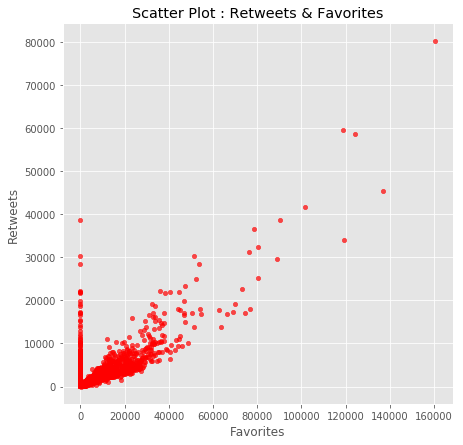

In [121]:
graph = tweet_stats.plot(kind='scatter',x='favorite_count', y='retweet_count', alpha = 0.7, figsize=(7,7), color='red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Scatter Plot : Retweets & Favorites')

# Save graph 
fig = graph.get_figure()
fig.savefig('chart1.png')

### Dog stage statistics

#### Dog stage : counts

In [122]:
dog_stage_counts = eta_clean.dog_stage.value_counts(dropna=False)

In [123]:
dfa = pd.DataFrame(dog_stage_counts)
dfa = dfa.reset_index()
dfa.columns = ['dog_stage', 'counts'] # change column names
dfa

,dog_stage,counts
0,NaN,1761
1,pupper,221
2,doggo,83
3,puppo,23
4,floofer,9


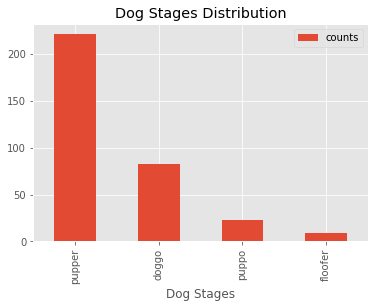

In [124]:
dfa = dfa[dfa.dog_stage.notnull()]
graph = dfa[['dog_stage','counts']].plot(x='dog_stage',kind='bar')
plt.xlabel('Dog Stages')
plt.title('Dog Stages Distribution')

# Save graph 
fig = graph.get_figure()
fig.savefig('chart2.png')

#### Dog stage : counts vs. favorites, retweets

In [125]:
dog_stage_stats = pd.merge(eta_clean[['tweet_id', 'dog_stage', 'gender']]
                           ,tweet_stats[['tweet_id', 'retweet_count', 'favorite_count']], on='tweet_id', how='inner' )

In [126]:
df = dog_stage_stats.groupby(['dog_stage']).agg({'retweet_count':'sum','favorite_count':'sum'}).reset_index()
df

,dog_stage,retweet_count,favorite_count
0,doggo,498981,1453490
1,floofer,33845,93328
2,pupper,500830,1520660
3,puppo,140620,489322


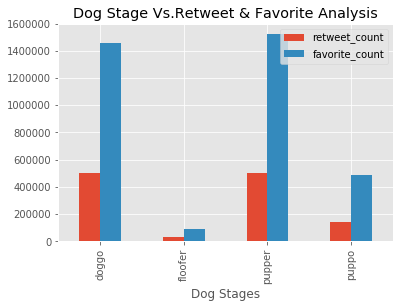

In [127]:
graph = df[['dog_stage','retweet_count','favorite_count']].plot(x='dog_stage',kind='bar')
plt.xlabel('Dog Stages')
plt.title('Dog Stage Vs.Retweet & Favorite Analysis')

# Save graph 
fig = graph.get_figure()
fig.savefig('chart3.png')

#### Dog stage : Gender Vs. Favorite Counts 

In [128]:
# Dont go with this graph 
dss = dog_stage_stats.groupby(['dog_stage', 'gender']).agg({'favorite_count':'sum'}).reset_index()
dss

,dog_stage,gender,favorite_count
0,doggo,Female,217081
1,doggo,Male,628515
2,floofer,Male,76163
3,pupper,Female,275515
4,pupper,Male,662673
5,puppo,Female,186590
6,puppo,Male,142124


In [129]:
# Below process is about Unmelting
dss_unmelt = dss.set_index(['dog_stage', 'gender'])['favorite_count'].unstack().reset_index()
dss_unmelt.columns.name = None
dss_unmelt

,dog_stage,Female,Male
0,doggo,217081.0,628515.0
1,floofer,NaN,76163.0
2,pupper,275515.0,662673.0
3,puppo,186590.0,142124.0


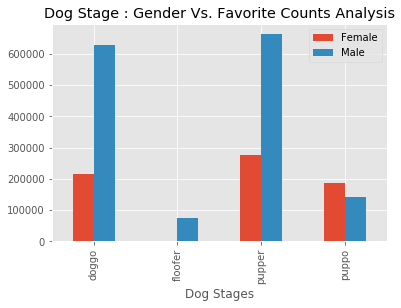

In [130]:
graph = dss_unmelt[['dog_stage','Female','Male']].plot(x='dog_stage',kind='bar')
plt.xlabel('Dog Stages')
plt.title('Dog Stage : Gender Vs. Favorite Counts Analysis')

# Save graph 
fig = graph.get_figure()
fig.savefig('chart4.png')

In [131]:
dog_stage_stats[['dog_stage', 'gender']]
print(dog_stage_stats.dog_stage.value_counts())
dog_stage_stats.shape

pupper     221
doggo       82
puppo       23
floofer      9
Name: dog_stage, dtype: int64


(2090, 5)

In [132]:
dog_stage_gender = dog_stage_stats.groupby(['dog_stage', 'gender']).agg({'favorite_count':'count'}).reset_index()
dog_stage_gender.rename(columns = {'favorite_count': 'count'}, inplace = True)

#dog_stage_gender
# Below process is about Unmelting
dss_unmelt = dog_stage_gender.set_index(['dog_stage', 'gender'])['count'].unstack().reset_index()
dss_unmelt.columns.name = None
dss_unmelt

,dog_stage,Female,Male
0,doggo,13.0,37.0
1,floofer,NaN,6.0
2,pupper,42.0,94.0
3,puppo,9.0,10.0


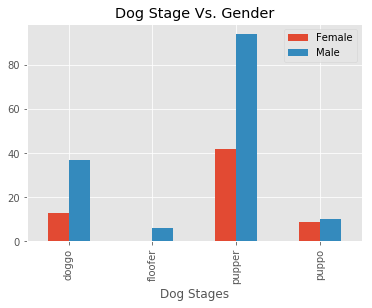

In [133]:
graph = dss_unmelt[['dog_stage','Female','Male']].plot(x='dog_stage',kind='bar')
plt.xlabel('Dog Stages')
plt.title('Dog Stage Vs. Gender')

# Save graph 
fig = graph.get_figure()
fig.savefig('chart5.png')

#### How users get to twitter

In [134]:
eta_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [135]:
df = eta_clean.source.str.replace('<[^<]+?>', '') 
#df.value_counts()
df = pd.DataFrame(df.value_counts())
df = df.reset_index()
df.columns = ['source', 'counts'] # change column names
df

,source,counts
0,Twitter for iPhone,1964
1,Vine - Make a Scene,91
2,Twitter Web Client,31
3,TweetDeck,11


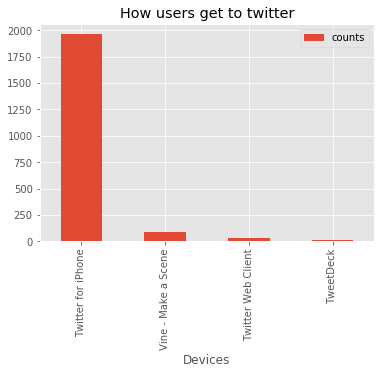

In [136]:
graph = df[['source','counts']].plot(x='source',kind='bar')
plt.xlabel('Devices')
plt.title('How users get to twitter')

# Save graph 
fig = graph.get_figure()
fig.savefig('chart6.png')

#### Top 25 Dog Breeds

In [137]:
df = pd.DataFrame(ip_clean.p1.value_counts())
df = df.reset_index()
df.columns = ['breed', 'counts'] # change column names
df = df.head(25)
#df

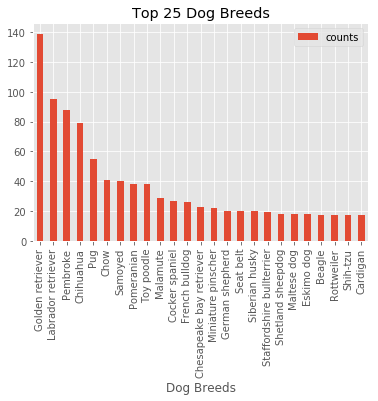

In [138]:
graph = df[['breed','counts']].plot(x='breed',kind='bar')
plt.xlabel('Dog Breeds')
plt.title('Top 25 Dog Breeds')

# Save graph 
fig = graph.get_figure()
fig.savefig('chart7.png')

#### Most Favorite & Retweeted is a Doggo

In [139]:
most = tweet_api_clean.favorite_count.max()
tweet_api_clean[['tweet_id', 'full_text', 'favorite_count', 'retweet_count' ]][tweet_api_clean.favorite_count == most]

,tweet_id,full_text,favorite_count,retweet_count
1017,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,160579,80331


In [141]:
df = tweet_api_clean[['tweet_id', 'full_text', 'favorite_count', 'retweet_count' ]].sort_values(by='favorite_count', ascending=False)
df.head()

,tweet_id,full_text,favorite_count,retweet_count
1017,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,160579,80331
397,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,136886,45322
517,807106840509214720,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,124035,58572
129,866450705531457537,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",119340,33987
1057,739238157791694849,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,118595,59542


### Here are top 5 dogs ( Twitter links are available in the above dataframe )

**Rank 1**
<img src="Top1.PNG" width=500 height=500>

In [149]:
#Image(filename='Top2.png', width=500, height=500) 

**Rank 2**
<img src="Top2.PNG" width=500 height=500>

**Rank 3**
<img src="Top3.PNG" width=500 height=500>

**Rank 4**
<img src="Top4.PNG" width=500 height=500>

**Rank 5**
<img src="Top5.PNG" width=500 height=500>

# Insights
1) Post get retweeted as they become favorites  
2) Pupper & Doggo happens to be the favorite dog stage   
3) Its seems people prefer/like male dogs. Exception seems to be in puppo  
4) Most of WeRateDog users use iPhone  
5) Top dog breed people like to have as a pet is Golden retriever  

# Lessons Learned
1. Pandas int64 doesn't support NaNs, so its better to convert certain columsn to strings. No wonder certain key columns have _str counterpart. Initially thought it was a duplicate column and why would they do it. Now i know.
2. StackOverflow is seriously helpful  

# Fun stuff

### From the few dog images i have seen. This is my favorite. I wish i could write a code to query JSON in tweet_api_df['extended_entities']

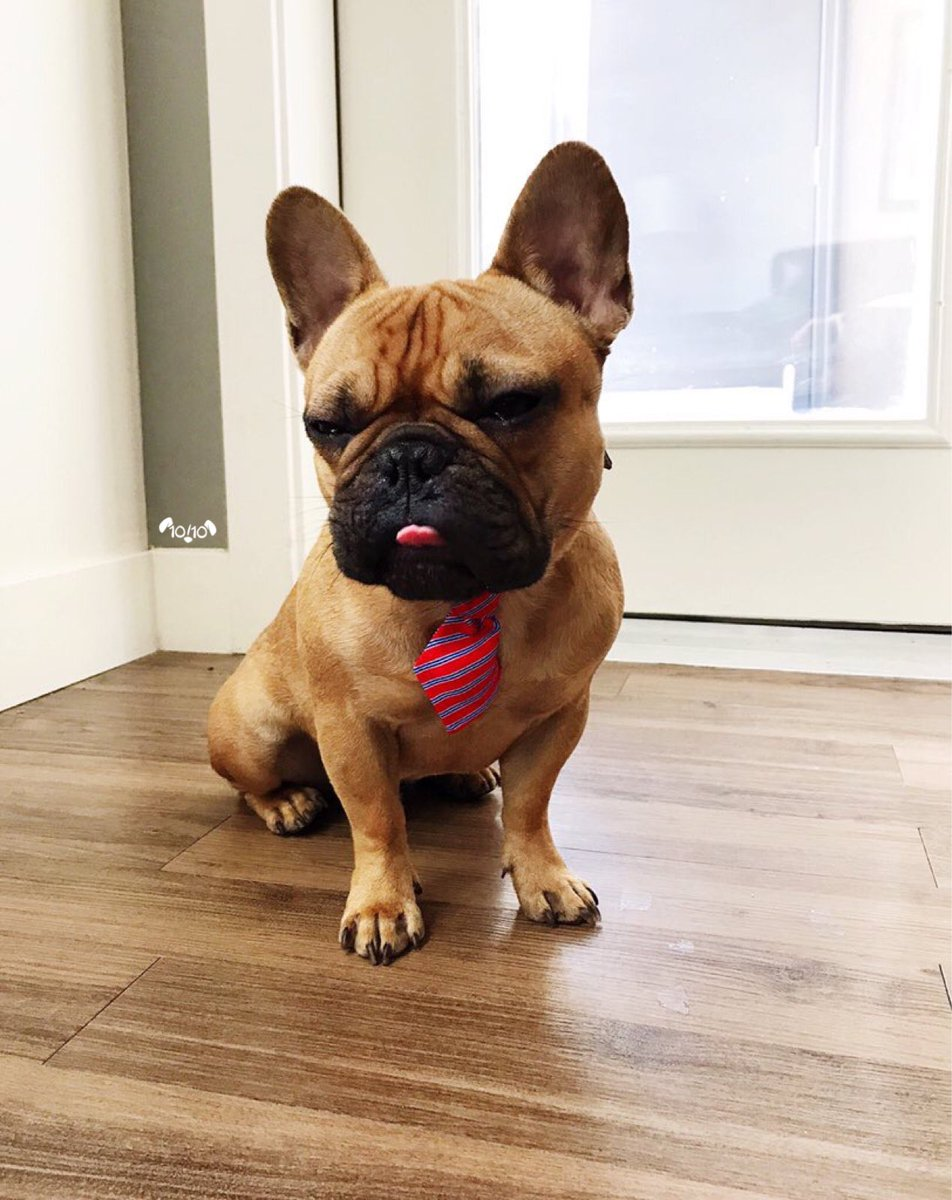

In [2]:
from IPython.display import Image
#Below to display directly from URL, since twitter doesn't work in office. Had to download the image for display
#Image(url='https://pbs.twimg.com/media/DFMWn56WAAAYUcB.jpg') 
Image(filename='DFMWn56WAAAYUcB.jpg', width=500, height=500) 

### Below is an accidental discovery
Found in tweet_id eta_df.tweet_id=855818117272018944.   
Somewhere down the link  https://twitter.com/markhalperin/status/855656431005061120  
There will be a post from @BethRickenbaker. You will find trump  
"Seriously, @delta??!?" Please seat me next to the adorable dog in the bow tie."  

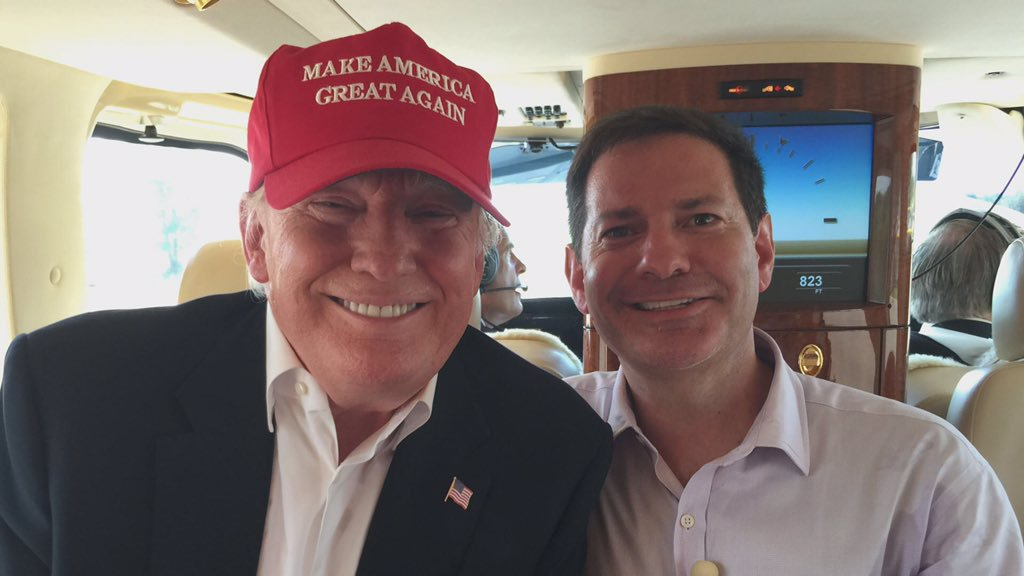

In [4]:
from IPython.display import Image
Image(filename='C-BVggtWAAAEhwQ.jpg', width=500, height=500) 